In [1]:
import pandas

In [2]:
pandas.__version__

'2.2.3'

In [3]:
import tensorflow

In [4]:
tensorflow.__version__

'2.10.0'

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import cv2
from cv2 import imshow
from PIL import Image

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from tqdm import tqdm

In [8]:
import os

In [9]:
with_mask = os.listdir('dataset/with_mask')

In [10]:
with_mask[:5]

['with_mask_1.jpg',
 'with_mask_10.jpg',
 'with_mask_100.jpg',
 'with_mask_1000.jpg',
 'with_mask_1001.jpg']

In [11]:
with_mask[-5:]

['with_mask_995.jpg',
 'with_mask_996.jpg',
 'with_mask_997.jpg',
 'with_mask_998.jpg',
 'with_mask_999.jpg']

In [12]:
without_mask = os.listdir('dataset/without_mask')

In [13]:
without_mask[:5]

['without_mask_1.jpg',
 'without_mask_10.jpg',
 'without_mask_100.jpg',
 'without_mask_1000.jpg',
 'without_mask_1001.jpg']

In [14]:
without_mask[-5:]

['without_mask_995.jpg',
 'without_mask_996.jpg',
 'without_mask_997.jpg',
 'without_mask_998.jpg',
 'without_mask_999.jpg']

In [15]:
print(f"Number of Images with mask: {len(with_mask)}")
print(f"Number of Images with out mask: {len(without_mask)}")

Number of Images with mask: 3725
Number of Images with out mask: 3828


### creating labels of the two classes

In [16]:
with_mask_labels = [1] * len(with_mask)
without_mask_labels = [0] * len(without_mask)

In [17]:
with_mask_labels[:5]

[1, 1, 1, 1, 1]

In [18]:
without_mask_labels[:5]

[0, 0, 0, 0, 0]

In [19]:
labels = with_mask_labels + without_mask_labels

In [20]:
labels[0:5]

[1, 1, 1, 1, 1]

In [21]:
labels[-5:]

[0, 0, 0, 0, 0]

#### displaying images

In [22]:
# with mask
img = mpimg.imread(r'dataset/with_mask/with_mask_100.jpg')

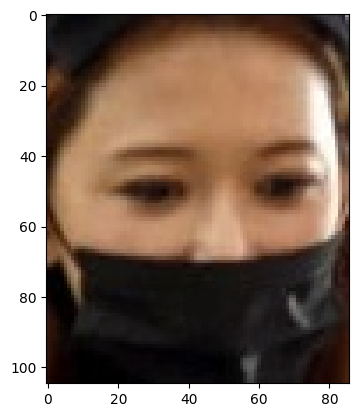

In [23]:
plt.imshow(img)

In [24]:
# without mask
img = mpimg.imread(r'dataset/without_mask/without_mask_10.jpg')

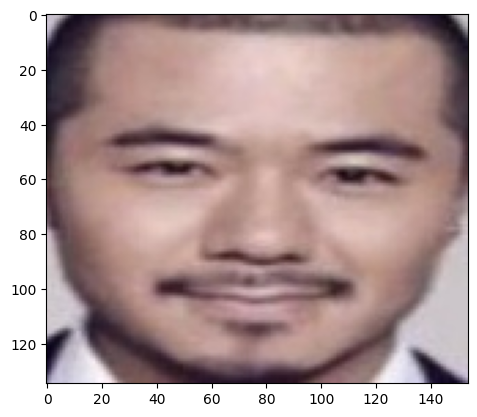

In [25]:
plt.imshow(img)

# Data Augmentation

In [26]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory

In [27]:
batch_size = 8
target_image_size = (128, 128)

In [28]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
)

In [29]:
original_images = ImageDataGenerator().flow_from_directory(
    directory=r'C:\Users\write\Desktop\face_mask\dataset',
    target_size=target_image_size,
    batch_size=batch_size,
    class_mode='sparse',
)

Found 7553 images belonging to 2 classes.


In [30]:
augment_images = datagen.flow_from_directory(
    directory=r'C:\Users\write\Desktop\face_mask\dataset',
    target_size=target_image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=True
)

Found 7553 images belonging to 2 classes.


In [31]:
val_datagen = ImageDataGenerator(
rescale=1./255
)

In [32]:
validation_data = val_datagen.flow_from_directory(
    directory=r'C:\Users\write\Desktop\face_mask\dataset',
    target_size=target_image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False,
)

Found 7553 images belonging to 2 classes.


In [33]:
def combined_generator(g1, g2):
    while True:
        x1, y1 = g1.next()
        x2, y2 = g2.next()

        yield (np.concatenate([x1, x2]), np.concatenate([y1, y2]))

In [34]:
train_gen = combined_generator(augment_images, original_images)

In [35]:
train_gen

<generator object combined_generator at 0x00000237C2E1DF50>

### For Saving Images

In [36]:
augment_images = datagen.flow_from_directory(
    directory=r'C:\Users\write\Desktop\face_mask\dataset',
    target_size=target_image_size,
    save_to_dir=r'C:\Users\write\Desktop\face_mask\augment_dataset',
    save_format='jpeg'
)

Found 7553 images belonging to 2 classes.


# Image Processing

1. Resize Images
2. Convert Images to Numpy array

In [37]:
# convert images to numpy arrays

# for mask image
with_mask_path = r"C:\Users\write\Desktop\face_mask\dataset\with_mask"

data = []

for img_file in tqdm(with_mask):
    image = Image.open(with_mask_path + '/' + img_file)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
    

# for no mask images
without_mask_path = r"C:\Users\write\Desktop\face_mask\dataset\without_mask"

for img_file in tqdm(without_mask):
    image = Image.open(without_mask_path + '/' + img_file)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
    
    


 64%|█████████████████████████████████████████████████████████████████████████████▏                                           | 2375/3725 [00:09<00:21, 63.34it/s]C:\Users\write\Desktop\face_mask\face_make_detection\lib\site-packages\PIL\Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3828/3828 [00:14<00:00, 268.49it/s]


In [38]:
type(data)

list

In [39]:
len(data)

7553

In [40]:
type(data[0])

numpy.ndarray

In [41]:
data[0].shape

(128, 128, 3)

In [42]:
data[0]

array([[[50, 58, 31],
        [46, 55, 33],
        [56, 58, 42],
        ...,
        [27, 32, 25],
        [29, 33, 19],
        [33, 40, 17]],

       [[47, 54, 30],
        [49, 58, 36],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [37, 42, 31],
        [31, 41, 23]],

       [[51, 58, 37],
        [50, 59, 37],
        [59, 64, 37],
        ...,
        [45, 44, 30],
        [29, 34, 27],
        [20, 30, 18]],

       ...,

       [[63, 73, 37],
        [66, 75, 41],
        [74, 84, 50],
        ...,
        [ 5,  3,  0],
        [20, 19, 14],
        [17, 16, 12]],

       [[58, 72, 34],
        [60, 70, 39],
        [68, 75, 49],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 30],
        [53, 64, 37],
        [57, 64, 42],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [19, 12, 13]]], dtype=uint8)

In [43]:
# converting image list and label list to numpy array

X = np.array(data)
y = np.array(labels)

In [44]:
X.shape

(7553, 128, 128, 3)

In [45]:
y.shape

(7553,)

## Train Test Split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [47]:
X_train.shape

(6042, 128, 128, 3)

In [48]:
y_train.shape

(6042,)

In [49]:
X_train[0]

array([[[226, 234, 201],
        [211, 216, 188],
        [188, 188, 169],
        ...,
        [186, 181, 165],
        [179, 175, 150],
        [166, 181, 136]],

       [[224, 228, 218],
        [201, 204, 195],
        [201, 199, 192],
        ...,
        [197, 190, 182],
        [175, 170, 153],
        [162, 180, 143]],

       [[205, 204, 212],
        [221, 220, 226],
        [195, 192, 196],
        ...,
        [183, 174, 173],
        [172, 167, 159],
        [181, 199, 171]],

       ...,

       [[156, 176, 197],
        [159, 180, 196],
        [164, 185, 196],
        ...,
        [ 89,  99,  71],
        [106, 113,  83],
        [ 99, 103,  68]],

       [[151, 177, 196],
        [167, 190, 208],
        [174, 192, 210],
        ...,
        [106, 113,  80],
        [ 99, 104,  64],
        [ 98,  98,  41]],

       [[162, 192, 210],
        [177, 199, 220],
        [175, 189, 213],
        ...,
        [103, 107,  70],
        [ 79,  80,  46],
        [ 99,  94,  61]]

In [50]:
# scaling the data

In [51]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [52]:
X_train_scaled.shape

(6042, 128, 128, 3)

In [53]:
X_test_scaled.shape

(1511, 128, 128, 3)

In [54]:
X_train_scaled[0]

array([[[0.88627451, 0.91764706, 0.78823529],
        [0.82745098, 0.84705882, 0.7372549 ],
        [0.7372549 , 0.7372549 , 0.6627451 ],
        ...,
        [0.72941176, 0.70980392, 0.64705882],
        [0.70196078, 0.68627451, 0.58823529],
        [0.65098039, 0.70980392, 0.53333333]],

       [[0.87843137, 0.89411765, 0.85490196],
        [0.78823529, 0.8       , 0.76470588],
        [0.78823529, 0.78039216, 0.75294118],
        ...,
        [0.77254902, 0.74509804, 0.71372549],
        [0.68627451, 0.66666667, 0.6       ],
        [0.63529412, 0.70588235, 0.56078431]],

       [[0.80392157, 0.8       , 0.83137255],
        [0.86666667, 0.8627451 , 0.88627451],
        [0.76470588, 0.75294118, 0.76862745],
        ...,
        [0.71764706, 0.68235294, 0.67843137],
        [0.6745098 , 0.65490196, 0.62352941],
        [0.70980392, 0.78039216, 0.67058824]],

       ...,

       [[0.61176471, 0.69019608, 0.77254902],
        [0.62352941, 0.70588235, 0.76862745],
        [0.64313725, 0

In [55]:
# Building Convolutional Neural Networks (CNN)

In [56]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

In [57]:
num_of_classes = 2

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

In [58]:
model.add(Dense(num_of_classes, activation='sigmoid'))

In [59]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [61]:
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=10, batch_size=64)

Epoch 1/10
85/85 [==============================] - 13s 100ms/step - loss: 0.5608 - accuracy: 0.7526 - val_loss: 0.2727 - val_accuracy: 0.8860
Epoch 2/10
85/85 [==============================] - 7s 82ms/step - loss: 0.3017 - accuracy: 0.8806 - val_loss: 0.2392 - val_accuracy: 0.9174
Epoch 3/10
85/85 [==============================] - 7s 81ms/step - loss: 0.2636 - accuracy: 0.8926 - val_loss: 0.2221 - val_accuracy: 0.9240
Epoch 4/10
85/85 [==============================] - 7s 82ms/step - loss: 0.2268 - accuracy: 0.9079 - val_loss: 0.2196 - val_accuracy: 0.9355
Epoch 5/10
85/85 [==============================] - 7s 82ms/step - loss: 0.1936 - accuracy: 0.9228 - val_loss: 0.2117 - val_accuracy: 0.9289
Epoch 6/10
85/85 [==============================] - 7s 81ms/step - loss: 0.1641 - accuracy: 0.9356 - val_loss: 0.2349 - val_accuracy: 0.9174
Epoch 7/10
85/85 [==============================] - 7s 81ms/step - loss: 0.1380 - accuracy: 0.9430 - val_loss: 0.2089 - val_accuracy: 0.9339
Epoch 8/10


In [62]:
# with tf.device('/CPU:0'):
#     history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=5, batch_size=64)

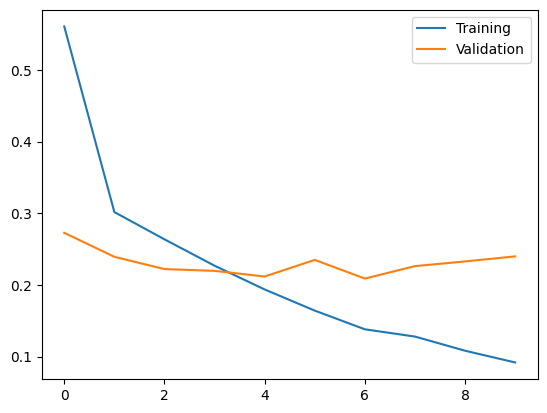

In [63]:
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.show()

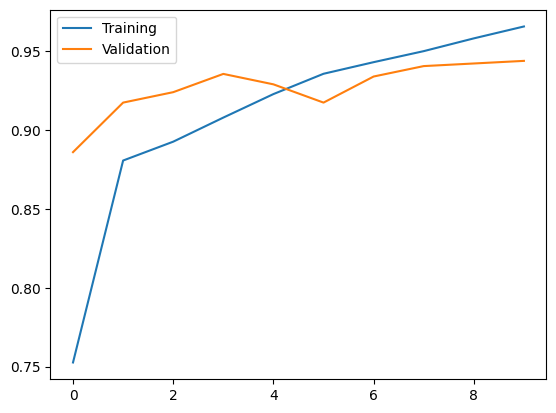

In [64]:
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()

In [65]:
model.save('model.h5')

In [69]:
loaded_model = tf.keras.models.load_model('model.h5')

In [72]:
x = X_train_scaled[0]

In [76]:
x.shape

(128, 128, 3)

In [77]:
x

array([[[0.88627451, 0.91764706, 0.78823529],
        [0.82745098, 0.84705882, 0.7372549 ],
        [0.7372549 , 0.7372549 , 0.6627451 ],
        ...,
        [0.72941176, 0.70980392, 0.64705882],
        [0.70196078, 0.68627451, 0.58823529],
        [0.65098039, 0.70980392, 0.53333333]],

       [[0.87843137, 0.89411765, 0.85490196],
        [0.78823529, 0.8       , 0.76470588],
        [0.78823529, 0.78039216, 0.75294118],
        ...,
        [0.77254902, 0.74509804, 0.71372549],
        [0.68627451, 0.66666667, 0.6       ],
        [0.63529412, 0.70588235, 0.56078431]],

       [[0.80392157, 0.8       , 0.83137255],
        [0.86666667, 0.8627451 , 0.88627451],
        [0.76470588, 0.75294118, 0.76862745],
        ...,
        [0.71764706, 0.68235294, 0.67843137],
        [0.6745098 , 0.65490196, 0.62352941],
        [0.70980392, 0.78039216, 0.67058824]],

       ...,

       [[0.61176471, 0.69019608, 0.77254902],
        [0.62352941, 0.70588235, 0.76862745],
        [0.64313725, 0

In [80]:
x = x.reshape(-1, 128, 128, 3)

In [81]:
loaded_model.predict(x)

1/1 [==============================] - 1s 1s/step


array([[0.02912072, 0.99550736]], dtype=float32)